In [58]:
#importing libraries
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')
warnings.filterwarnings(action='ignore')


In [59]:
#dataframe 
df = pd.read_csv("TransformedHousePrice.csv")
df.head(5)


,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900,3,1.00,1180,5650,1.0,0,7,1180,0,...,0,0,0,0,0,0,0,0,0,0
1,538000,3,2.25,2570,7242,2.0,0,7,2170,400,...,0,0,1,0,0,0,0,0,0,0
2,180000,2,1.00,770,10000,1.0,0,6,770,0,...,0,0,1,0,0,0,0,0,0,0
3,604000,4,3.00,1960,5000,1.0,0,7,1050,910,...,0,0,0,1,0,0,0,0,0,0
4,510000,3,2.00,1680,8080,1.0,0,8,1680,0,...,0,0,0,0,1,0,0,0,0,0


In [60]:
# Standard scaling(Preprocessing)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Y = df['Sale_Price']
X = scaler.fit_transform(df.drop(columns=['Sale_Price']))
X = pd.DataFrame(data=X, columns=df.drop(columns=['Sale_Price']).columns)
X


,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,-0.398724,-1.447526,-0.979905,-0.228291,-0.915389,-0.30579,-0.563993,-0.734722,-0.658697,0.544734,...,-0.087181,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,-0.398724,0.175684,0.533718,-0.189858,0.936817,-0.30579,-0.563993,0.460990,0.245134,0.680915,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,-1.474115,-1.447526,-1.426369,-0.123276,-0.915389,-0.30579,-1.468566,-1.229916,-0.658697,1.293731,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,0.676667,1.149611,-0.130534,-0.243983,-0.915389,-0.30579,-0.563993,-0.891735,1.397518,0.204281,...,-0.087181,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.398724,-0.148958,-0.435436,-0.169628,-0.915389,-0.30579,0.340581,-0.130827,-0.658697,-0.544715,...,-0.087181,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21604,-0.398724,0.500326,-0.598777,-0.337386,2.789023,-0.30579,0.340581,-0.311996,-0.658697,-1.293712,...,-0.087181,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
21605,0.676667,0.500326,0.250594,-0.224356,0.936817,-0.30579,0.340581,0.630080,-0.658697,-1.463938,...,-0.087181,2.853220,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
21606,-1.474115,-1.772168,-1.154135,-0.332099,0.936817,-0.30579,-0.563993,-0.927969,-0.658697,-1.293712,...,-0.087181,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
21607,-0.398724,0.500326,-0.522551,-0.307041,0.936817,-0.30579,0.340581,-0.227451,-0.658697,-1.123485,...,-0.087181,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


In [61]:
#Correlation refining
k = X.corr()
z = [[str(i), str(j)] for i in k.columns for j in k.columns if (
    k.loc[i, j] > abs(0.5)) & (i != j)]
z, len(z)


([['No of Bedrooms', 'No of Bathrooms'],
  ['No of Bedrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Bedrooms'],
  ['No of Bathrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Floors'],
  ['No of Bathrooms', 'Overall Grade'],
  ['No of Bathrooms', 'Area of the House from Basement (in Sqft)'],
  ['No of Bathrooms', 'Living Area after Renovation (in Sqft)'],
  ['Flat Area (in Sqft)', 'No of Bedrooms'],
  ['Flat Area (in Sqft)', 'No of Bathrooms'],
  ['Flat Area (in Sqft)', 'Overall Grade'],
  ['Flat Area (in Sqft)', 'Area of the House from Basement (in Sqft)'],
  ['Flat Area (in Sqft)', 'Living Area after Renovation (in Sqft)'],
  ['Lot Area (in Sqft)', 'Lot Area after Renovation (in Sqft)'],
  ['No of Floors', 'No of Bathrooms'],
  ['No of Floors', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 'No of Bathrooms'],
  ['Overall Grade', 'Flat Area (in Sqft)'],
  ['Overall Grade', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 

In [62]:
# Importing Variance_inflation_Factor funtion from the Statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = X

# Calculating VIF for every column
VIF = pd.Series([variance_inflation_factor(vif_data.values, i)
                for i in range(vif_data.shape[1])], index=vif_data.columns)
VIF


No of Bedrooms                                  1.639470
No of Bathrooms                                 3.374992
Flat Area (in Sqft)                          1481.681648
Lot Area (in Sqft)                              2.108079
No of Floors                                    2.127787
No of Times Visited                             1.432385
Overall Grade                                   2.967448
Area of the House from Basement (in Sqft)    1205.549115
Basement Area (in Sqft)                       345.465009
Age of House (in Years)                         2.629539
Latitude                                        2.471442
Longitude                                       1.672691
Living Area after Renovation (in Sqft)          3.068139
Lot Area after Renovation (in Sqft)             2.144347
Year Since Renovation                           2.788098
Condition_of_the_House_Excellent               53.578111
Condition_of_the_House_Fair                   166.129930
Condition_of_the_House_Good    

In [63]:
#data spliting
y = df.iloc[:, 0]
x = df.iloc[:, 1:31]


In [64]:
#train/test data split for variables
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.40, random_state=101)

x_train.shape, x_test.shape, y_train.shape, y_test.shape


((12965, 30), (8644, 30), (12965,), (8644,))

In [65]:
#import Linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()


In [66]:
#executing linear regression on training dataset
lr.fit(x_train, y_train)


LinearRegression()

In [67]:
#coefficient of lr
lr.coef_

array([ -3585.62435032,  13009.40464118, 100875.80421533,  14188.18262674,
         2487.37873749,  27200.52696581,  59688.00015312, -11695.54436315,
       -21459.67467807,  28640.63825997,  22081.7152054 , -23369.77847303,
        18889.54479968,  -2172.08306403,  -9971.1875367 ,  28644.40941179,
        26023.47651748,  28930.17949913,   2182.65374126,  14101.9901884 ,
         9847.31022066,  12525.71530545,  33483.93997974,  62470.4714588 ,
        80332.47672475,  50166.91404653,  73655.37119852,  40809.07385279,
        66722.97587032,  22123.61117253])

In [68]:
#creating prediction model
predictions = lr.predict(x_test)
predictions

array([549033.55367362, 644719.05584475, 615111.72099748, ...,
       607971.45656016, 203412.19335353, 329292.94302465])

In [69]:
#importing libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

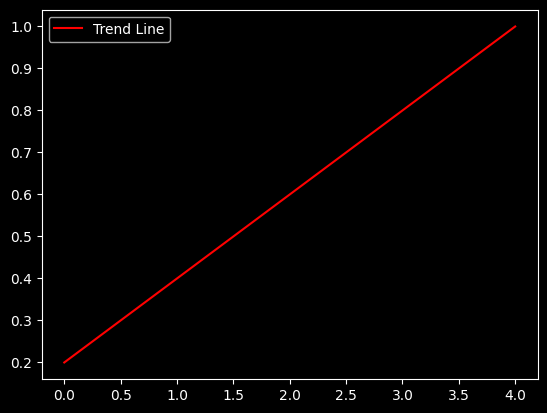

In [70]:
#Prediction on train data
x = [0.2, 0.4, 0.6, 0.8, 1.0]
y = [0.00, 0.25, 0.50, 0.75, 1.00]

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope*np.array(x) + intercept


plt.plot(x, 'r', alpha=1.0, label='Trend Line',)
#plt.scatter(y_test, predictions)
plt.legend()
plt.show()

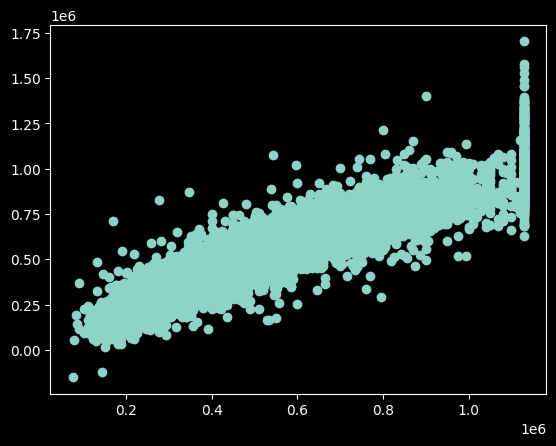

In [71]:
#scatter plot for training data
plt.scatter(y_test,predictions)
#plt.plot(x, predictions, color = 'red')


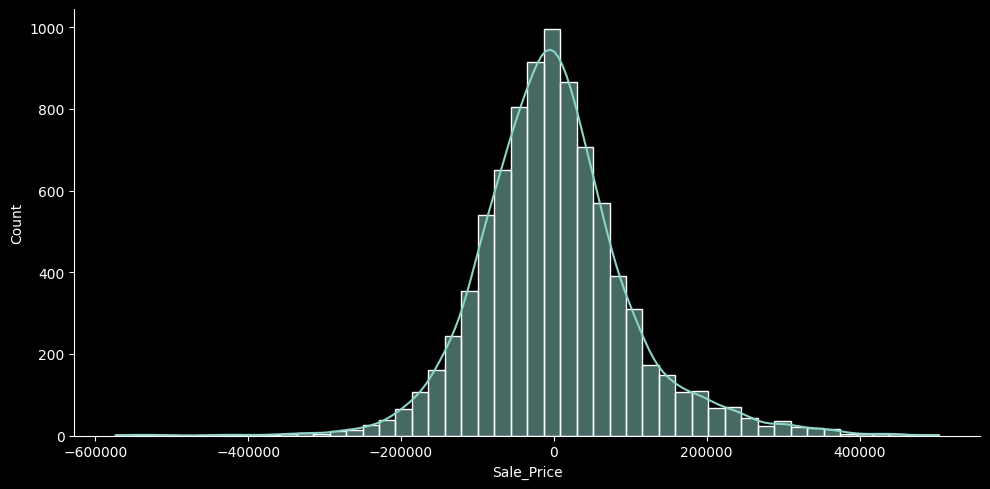

In [72]:
#estimation kde
sns.displot((y_test-predictions),kde= True,bins=50,aspect=2)